# An Introduction to Network Analysis in R
**Author: Lena Berger**<br>
**Date: May 11, 2021**

# Networks are everywhere

<p style="text-align:right; font-style: italic"> [N]etworks will dominate the new centruy to a much greater degree<br> than most people are yet ready to acknowledge. <br>(Barabasi, 2014, p.7) </p>

<br>

Networks are an integral part of our daily lives. Connections on Facebook, Twitter, or LinkedIn are networks of contacts and followers. Roads, railroads, metros, and flight routes form transportation networks. Goods and services are the result of buyer and supplier networks. Power and water are provided via complex networks of lines and pipes. Every day, we use these networks, often without thinking of them as “networks”—we ask friends for favors, travel to work, consume goods, and open the tap. <br><br>
Network analysis is the systematic study of the structures of these networks. It provides tools to answer questions such as: Which friend should I contact if I am looking for a job? What is the shortest way to get from Las Vegas to Rome? How can we prevent grid overload? <br><br>
This tutorial provides an introduction to network analysis in Python. It discusses key network concepts and their application in Python. The tutorial is aimed at beginners and deliberately limits use of mathematical formulas. The next section provides an introduction to the logic of network analysis. The following sections walk through an exemplary analysis. 

# From Networks to Network Analysis

## Describing networks

Networks are represented as sets of **nodes** or vertices (N) connected through sets of **edges** or ties (E), short G = (N, E). Nodes can be, for example, people, corporations, countries, airports, phones, and email addresses. Edges are the links between these nodes such as friendship between people, business transactions between corporations, migration between countries, flights between airports, and so on. Figure 1 shows a simple network of four people (nodes) connected by four links (edges). Edges from a node to itself such as when a person sends an email to herself are called **self-links**. While possible, these links are often excluded from analysis. <br>

<p align="center">
    <img src="graphs/Network.png" width="300" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 1. Network of four people (nodes) connected by four links (edges). 
    </figcaption>
</p>

Edges can be directed or undirected and weighted or unweighted. **Directed** edges refer to relations that involve a directionality such as person A calling person B or a flight connection from city X to city Y. **Undirected** edges refer to relations without directionality such as having dinner together or collaborating on a project. <br><br>
**Weighted** edges are relations that can be quantified such as number of emails sent or amount of money given. **Unweighted** edges are relations that are not quantified such as being a friend or a co-worker. <br><br> 
Figure 2 shows the four different types of networks resulting from combinaions of these edge characteristics. Undirected, unweighted networks are the easiest to analyze. Therefore, if justifiable, other types of networks are often transformed to this type for analysis. 

<p align="center">
    <img src="graphs/Network types.png" width="500" height="500" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 2. Four different types of networks according to edge characteristics. 
    </figcaption>
</p>

Finally, on the network level, we differentiate unipartite vs. bipartite networks (see Figure 3 for a schematic overview). **Unipartite networks** are composed of one type of nodes and every node can, in principle, be connected to every other node. An example is a friendship network of people. In contrast, **bipartite networks** (also called two-mode data) are composed of two types of nodes with links only *between* but *not among* types. An example is attendance of parties by people. Here, nodes are parties and people with links only between people and parties (but not among parties or among people). Bipartite networks can be transformed into unipartite networks. For example, we can link people based on co-attendance of parties. Figure 3 provides a schematic representation of unipartite and bipartite networks. 

<p align="center">
    <img src="graphs/Unipartite vs bipartite.png" width="400" height="400" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 3. Unipartite vs. bipartite networks. 
    </figcaption>
</p>

## Network Data

Network data is commonly stored using edge lists or adjacency matrices (see Figure 4 for a schematic). **Edge lists** are sets of rows with every row representing an edge in the network. For directed networks, the first entry indicates the start and the second entry the end of an edge. An additional column may be added to indicate the strength (weight) of the edge. **Adjacency matrices** are matrices with nodes in the columns and rows. The entries in the matrix indicate presence (1) or absence (0) or strength (weight) of an edge. For directed networks, rows usually represent start and columns end of edges. The diagonal in an adjacency matrix shows self-links. 

<p align="center">
    <img src="graphs/Network data.png" width="650" height="450" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 4. Edgelist and adjacency matrix for network of four people. 
    </figcaption>
</p>

# Analyzing Networks

Now that we are familiar with the logic of network data, we will apply our new tool to analyze a real-world network of social contacts. The following sections walk through an exemplary analysis of the Karate Club network. The Karate Club network shows the social connections between members of a university karate club. Two members are linked in the network if they regularly interact *outside* of the karate club. The network data was collected by Zachary (1977) and is based on observations from 1970 to 1972. The data is included in the NetworkX library. 

## Prepare the Network

We start by loading the libraries and the network.

In [2]:
install.packages("MASS")

Installing package into 'C:/Users/Lena/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
       binary source needs_compilation
MASS 7.3-53.1 7.3-54              TRUE

  Binaries will be installed
package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lena\AppData\Local\Temp\RtmpKE7Baz\downloaded_packages


In [3]:
# Import libraries
# We will also work with igraph. Please do NOT load igraph yet.
library(ergm)
library(statnet)
library(GGally)
library(igraphdata)

# Load karate club data and change it to matrix format
adjacency <- as.matrix(igraph::as_adj(karate))
faction <- as.matrix(igraph::vertex_attr(karate, "Faction"))
rownames(faction) <- rownames(adjacency)

Warning message:
"package 'ergm' was built under R version 4.0.0"
ergm: version 3.10.4, created on 2019-06-10
Copyright (c) 2019, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, University of Wollongong
                    Martina Morris, University of Washington
                    with contributions from
                    Li Wang
                    Kirk Li, University of Washington
                    Skye Bender-deMoll, University of Washington
                    Chad Klumb
Based on "statnet" project software (statnet.org).
For license and citation information see statnet.org/attribution
or type citation("ergm").

NOTE: Versions before 3.6.1 had a bug in the implementation of the bd()
constriant which distorted the sampled distribution s

               Installed ReposVer Built  
ergm           "3.10.4"  "3.11.0" "4.0.0"
network        "1.16.0"  "1.16.1" "4.0.0"
sna            "2.5"     "2.6"    "4.0.0"
statnet.common "4.3.0"   "4.4.1"  "4.0.0"
tergm          "3.6.1"   "3.7.0"  "4.0.0"
tsna           "0.3.1"   "0.3.3"  "4.0.0"


Restart R and use "statnet::update_statnet()" to get the updates.
Warning message:
"package 'GGally' was built under R version 4.0.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 4.0.2"

ERROR: Error: package or namespace load failed for 'GGally' in inDL(x, as.logical(local), as.logical(now), ...):
 unable to load shared object 'C:/Users/Lena/Documents/R/win-library/3.6/Rcpp/libs/x64/Rcpp.dll':
  LoadLibrary failure:  The specified procedure could not be found.



Next, we transform the data into netwokr format and inspect the network. 

In [ ]:
# Transform the data into network format 
karate_net <- network(adjacency, matrix.type = "adjacency", 
                      directed = FALSE, ignore.eval = TRUE)

# Look at the network object 
karate_net

The network is undirected and unweighted. It consists of 34 nodes (club members) and 78 edges (social connections) with no self-links.  

## Visualize the Network

A network graph provides a first overview of a network and can help spot key characteristics visually. Here, we use NetworkX visualization tools (for other tools see <a href="https://pypi.org/project/nxviz/">nxviz</a> and this <a href="https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9">Visualization Tutorial</a>). 

Text(0.5, 1.0, 'Visualization of the karate club network')

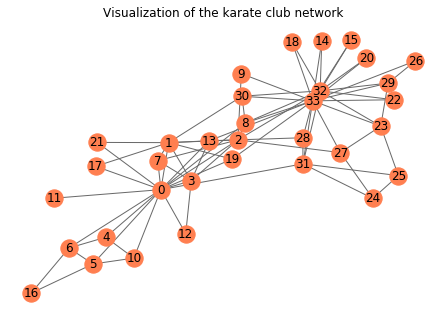

In [33]:
# Visualize the network
# Simple visualization 
ggnet2(net = karate_net, label = TRUE) 

In [ ]:
# Add some color
ggnet2(net = karate_net, label = TRUE, node.color = "coral2")

*Note: If you follow this tutorial, your network might look slightly different. This is because placement of nodes is not predefined--there are many different ways to visualize this network.* <br><br>
The visualization reveals two interesting characteristics. First, nodes differ in the number of edges--some club members have many social connections while others have few. The nodes 0, 32, and 33 stand out as members with high numbers of connections. Second, the network seems to consist of two "subgroups." One subgroup forms around node 0 and another group around nodes 32 and 33. 

## Explore the 'Whole' Network

To describe the overall structure of a network, we can use the concepts component, isolate, and density. **Components** are unconnected parts of the network, or more formally: maximal sets of nodes that can reach each other (Borgatti, Everett, & Johnson, 2003, p.16). For example, a network consisting of two components essentally is two groups of nodes with links among members of each group but no links connecting the two groups. <br><br> **Isolates** are nodes that have no connections (Borgatti, Everett, & Johnson, 2003, p.14). <br><br>
**Density** is the proportion of edges that could exist that actually does exist. This is best understood using an example. The karate club network has 78 edges—this is the number of links that “do exist.” Imagine, every member of the club was connected to every other member--this is the number of all possible links. For an undirected network like the karate club network, this number can be calculated by *n(n-1)/2* or *'n choose 2'* with n being the number of nodes in the network. In the karate club network, this would be (34*33)/2 = 561 possible edges. Accordingly, the density is 78 / 561 = 0.139. 

In [34]:
# Number of componenents
# Save names of club members 
club_members <- network.vertex.names(karate_net)

# Components 
print("Number of components: ", components(karate_net))

# Isolates
isolate <- isolates(karate_net)
print("Isolates: ", club_members[isolate])

# Density
print("Density: ", gden(karate_net, mode = "graph"))

Original network
Number of components:  1
Number of isolates:  0
Density:  0.13903743315508021


The karate club network consists of one component and has no isolates. Its density is 0.139, as calculated above. This means that 13.9% of all links that could exist--if every member was connected to every other member--do actually exist. Densitiy is sometimes interpreted as the probability that an edge exists between two randomly chosen nodes of the network (see Borgatti, Everett, & Johnson, 2003, pp.150-151). Accordingly, we could say that there is a 13.9% probability that any two members of the karate club socialize outside of club activities. It is important to note that there are no standards for low or high density. What is high or low depends on the context of the analysis, particularly the tpye of connections studied. Also important to note is that density should be used with care when comparing networls of different size (for more detail see Borgatti, Everett, & Johnson, 2003, pp.150-151).

## Explore Individual Nodes

To determine the role of an actor in a network, we use centrality measures. **Centrality measures** describe the position of a node in the network or its structural importance (Borgatti, Everett, & Johnson, 2013, p.164). We differentiate degree centrality, closeness centrality, and betweenness centrality. Figure 5 provides a schematic overview of these concepts.<br><br> 
**Degree centrality** is the number of connections (edges) that a node has. For directed networks, we differentiate between outdegree centrality, i.e., the number of edges that start at the node, and indegree centrality, i.e., the number of edges that end at the node. 

<p align="center">
    <img src="graphs/Centrality measures.png" width="900" height="750" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 5. Centrality measures for node F. 
    </figcaption>
</p>

Degrees can provide insights into network structures, beyond actor roles. A **degree distribution** is a histogram of the degrees of all nodes in a network. For many real world networks, the degree distribution shows a distinct pattern: *many actors* have relatively *few connections* and *few actors* have relatively *many connections*. Figure 5 shows a typical real-world network and a comparable random network. In the random network, every connection is equally likely. This leads to a degree distribution that is roughly normal. In contrast, the degree distribution of the real-world network is right skewed. This is called *power law distribution* and this type of networks are called *scale free* (for explanations on mechanisms behind this see Barabasi, 2014; Caldarelli et al., 2018; Bianconi & Barabasi, 2001). 

<p align="center">
    <img src="graphs/Degree distribution.png" width="300" height="300" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 6. Degree distribution of a typical real-world network and a comparable random network. 
    </figcaption>
</p>

**Closeness centrality** is the sum of shortest distances (*geodesic distances*) from one node to all other nodes (Borgatti, Everett, & Johnson, 2013, p.173). Put simply, we calculate for a node how many steps it would take to reach each of the other nodes, if we take the shortest path, and sum these number of steps up. Based on this calculation, higher closeness centrality means that a node is more peripheral. It is important to note that many implementations such as NetworkX rescale the measure such that higher numbers indicate a node is more central and lower numbers indicate a node is more peripheral. <br><br>
Finally, **betweenness centrality** is the number of shortest paths (*geodesic paths*) that pass a node. For every pair of nodes, we find the shortest path within the network. This is essentially what we did for calculating closeness centrality but this time we do it for every pair of nodes in the network. Then, a node’s betweenness centrality is the number of these paths that the node is part of. <br><br>
Degree, closeness, and betweenness centrality measure different characteristics of the position of a node. Let’s look at an example. Imagine, there is gossip in a network of people. A person with high degree centrality is likely to hear the gossip because there are many ways in which it can reach the person. A person with high closeness centrality (rescaled with high meaning more central) can spread gossip effectively in the network because the person is “close” to everyone. Finally, a node with high betweeness centrality can decide if the gossip reaches different parts of the network—node F in Figure 5, for example, could decide if gossip from node C ever reaches node H. <br><br>
Libraries differ  in the implementation of these measures in terms of two key aspects: (1) The first relates to absolute vs. normalized values. Many libraries such as NetworkX normalize the measures by network size. (2) The second relates to implementation for unconnected networks (i.e., networks with more than one component). Closeness and betweeness centrality can technically not be computed for networks with multiple components because some nodes cannot reach other nodes. Many libraries such as NetworkX compute these measures for connected parts separately. 

In [35]:
# Degree centrality
degree <- degree(karate_net, gmode = "graph")
names(degree) <- network.vertex.names(karate_net)
sort(degree)

Club memberss with highest degree centrality (normalized):
    Degree centrality
33           0.515152
0            0.484848
32           0.363636
2            0.303030
1            0.272727


Next, we explore the degree distribution. 

Text(0.5, 1.0, 'Degree distribution of the Karate Club Network')

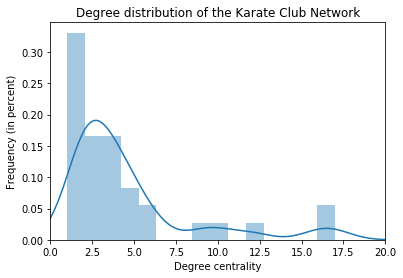

In [37]:
# Explore degree distribution
hist(degree, breaks = 12, main = "Degree distribution", xlab = "Degree")

The degree distribution of the karate club network shows the power law distribution common for real-world network. Most club members have relatively few social connectsion and few club members have relatively many connections. 

In [38]:
# Get Closness centrality
close <- closeness(karate_net, gmode = "graph")
names(close) <- network.vertex.names(karate_net)
sort(close)

Club members with HIGHEST closeness centrality:
    Closeness centrality
0               0.568966
2               0.559322
33              0.550000
31              0.540984
13              0.515625

Club members with highest betweenness centrality:
    Betweenness centrality
0                 0.437635
33                0.304075
32                0.145247
2                 0.143657
31                0.138276


In [ ]:
# Get betweenness centrality
between <- betweenness(karate_net, gmode = "graph")
names(between) <- network.vertex.names(karate_net)
sort(between)

The club members 0 and 33 are high on all three centrality measures. This conforms with our earlier observation based on the graph. These nodes represent the karate trainer Mr. Hi (0) and the club president John A. (33). 
The high centrality of the members across all measures and the "clustering" of the network around them is interesting. The reason likely is a conflict between Mr. Hi and John A as described by Zachary (1977). Zachary (1977) reports a disagreement taking place at the beginning of his observation period. Mr. Hi attempted to raise the price of karate lessons. John A. objected this. Over time, the club became divided over the issue. The club meeting was a central place where these differences were negotiated. Zachary explains: <br>
> *During the factional confrontations […], the club meeting remained the setting for decision making. If, at a given meeting, one faction held a majority, it would attempt to pass resolutions and decisions favorable to its ideological position. The other faction would then retaliate at a future meeting when it held the majority, by repealing the unfavorable decisions and substituting ones favorable to itself. Thus, the outcome of any crises was determined by which faction was able to 'stack' the meetings most successfully. (Zachary, 1977, p.453)*

The importance of mobilizing supporters may explain the centrality of the two actors. 

## Looking at Subgroups

So far, our statement of subgroups around Mr. Hi and John A. is based on visual inspection of the network. This final part introduces a method to systematically identify subgroups. <br><br>
**Communities** are cohesive and mutually exclusive subgroups in a network (Borgatti, Everett, & Johnson, 2013, p.195). A common way to detect communities is through the Girvan-Newman algorithm (see Figure 7 for a schematic overview). The algorithm systematically disconnectes the network. Edges are removed based on edge betweenness. Similar to betwenness centrality of nodes, edge betwenness measures how many shortest paths go through an edge. The algorithm iteratively removes the edge or edges with the highest edge betwenness until no edges are left. The step-wise disconnection can be shown as a dendrogram. 

<p align="center">
    <img src="graphs/Community detection.png" width="800" height="300" align="center"/>
    <figcaption style="text-align:center; font-style: italic">
        Figure 7. Overview of Girvan-Newman algorithm. 
    </figcaption>
</p>

The community membership can be used as a node attribute. **Node attributes** are characteristics of nodes. They can be numerical or categorical. Examples are the sex of an actor, the sector of a corporation, the population of a country, or community in the network. Node attributes can be used in visualizations or in more advanced network models.

*Important note on package use: We can use packages by loading them and then use all the functions. This is most common. However, we can also access functions when packages are not loaded. For this, we write "packagename::function_name." This is especially useful when two packages use the same function names. igraph and sna use some of the same function names.Therefore, we will access igraph using the "::" method.*

In [39]:
# Get igraph object (this is another type of network object)
karate_inet <- igraph::graph.adjacency(adjacency_matrix, mode = "undirected")

# Simplify igraph object
karate_inet <- igraph::simplify(karate_inet, remove.multiple = TRUE, 
                                remove.loops = TRUE)

# Look at the igraph object
karate_inet		
igraph::V(karate_inet)	# This shows you the vertex set. 
igraph::E(karate_inet)	# This shows you the edge set.

<generator object girvan_newman at 0x00000189641DC9C8>


In [ ]:
# Plot the network
igraph::plot.igraph(karate_inet, vertex.size = 10, vertex.label.cex = 0.8)

We use the Girvan Newman algorithm to get the communities. 

In [40]:
# Use the Girvan-Newman approach to detect communities
communities <- igraph::edge.betweenness.community(karate_inet)

igraph::plot_dendrogram(communities)

Top level communities
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

Second level communities
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})

Bottom level communities
({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {31}, {32}, {33})


In the first step, the network is split into two communities. The first community contains 15 and the second 19 club members. In the next step, the network is split into three communities. One communities consists of node 9 only. If we continue, we will eventually have 34 communities with every node forming its own community. 

The dendrogram shows two main communities, one containing Mr. Hi and the other John A. Each of the two communities consists of several sub-communities. Node 9 is a special case. It is not clearly associated with either of the two main communities. Let's next visualize different community solutions. <br><br> 

We can now use community membership as a node attribute and color the nodes accordingly. For simplicity, we will use the solution suggested by igraph. 

C:\Users\Lena\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0.5, 1.0, 'Five communities')

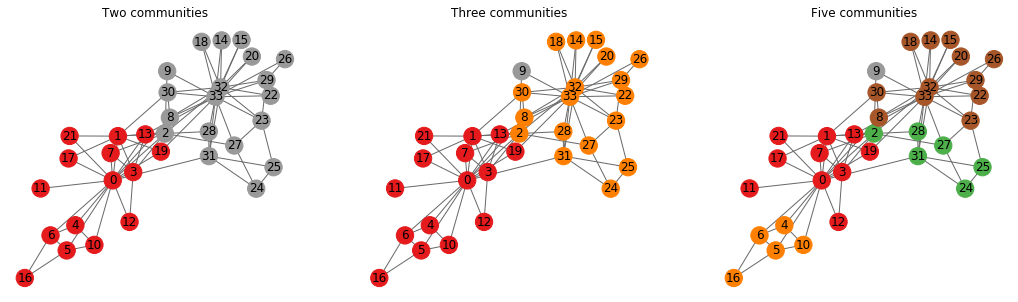

In [44]:
# Visualize the network with colors according to communities
igraph::plot.igraph(karate_inet, vertex.color = communities$membership, 
                    vertex.size = 10, vertex.label.cex = 0.8)

As mentioned earlier, Zachary reports a conflict at the beginning of the oberservation period between Mr. Hi (node 0) and John A. (node 33). This conflict effentually led to the splitting of the club and the creation of two independent organizations, one forming around Mr. Hi and the other around John A. Club membership after the fission is stored as the node attribute "club". In our final graph, we will color nodes according to club membership after the fission and compare the results to our community solutions. 

Text(0.5, 1.0, 'Club membership after fission')

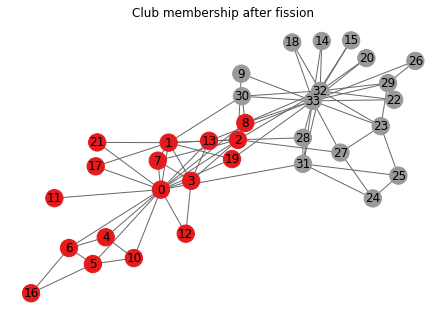

In [45]:
# Add attributes to our network object
karate_net %v% "faction" <- faction[,2] 

# Visualize the network with colors according to attributes
# Add some color
ggnet2(net = karate_net, label = TRUE, node.color = "faction", 
       color.palette = c("1" = "dodgerblue1", "2" = "hotpink"))

The club membership after the fission corresponds with the two communities that we identified based on the network structure, except nodes 8 and 2. Hence, club membership can be predicted pretty well based on the social contacts networks. 

# Summary

Contratulations, you made it to the end of this tutorial! You have visualized a network, explored overall network structure, explored actor positions, identified communities, and analyzed one of the most prominent datasets in the network literature. Well done!

# References

Barabasi, A.L. (2014). *Linked-how Everything is Connected to Everything Else and what it Means.* New York City: F. Perseus Books Group.

Bianconi, G., & Barabási, A. L. (2001). Competition and multiscaling in evolving networks. *Europhysics Letters, 54*(4), 436-442.

Borgatti, S.P., Everett, M.G., & Johnson, J.C. (2013). *Analyzing Social Networks.* London: SAGE. 

Caldarelli, G., Capocci, A., Rios, P., & Munoz, M.A. (2018). *Scale-free networks without growth or preferential attachment: Good get richer.* Available at: arXiv preprint cond-mat/0207366. (accessed October 12, 2020)

Zachary, W.W. (1977). An Information Flow Model for Conflict and Fission in Small Groups. *Journal of Anthropological Research 33*(4), 452-473. 